# Imports

In [322]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from matplotlib import rcParams
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

uni_df = pd.read_csv("university_rank_no_nan.csv", index_col="University", delimiter=";")

uni_df.head()

,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,Teaching,Research,Citations,Industry_Income,International_Outlook,International_Students(%),Percentage_Female(%),Percentage_Male(%)
University,,,,,,,,,,,,,
University of Oxford,United Kingdom,20.664,11.2,95.4,1.0,90.5,99.6,98.4,65.5,excellent,41.000000,46.000000,54.0
California Institute of Technology,United States,2.240,6.4,94.5,2.0,92.1,97.2,97.9,88.0,excellent,30.000000,47.583088,66.0
University of Cambridge,United Kingdom,18.978,10.9,94.4,3.0,91.4,98.7,95.8,59.3,excellent,37.000000,47.000000,53.0
Stanford University,United States,16.135,7.3,94.3,4.0,92.8,96.4,99.9,66.2,excellent,11.086892,43.000000,57.0
Massachusetts Institute of Technology,United States,11.247,8.6,93.6,5.0,90.5,92.4,99.5,86.9,excellent,34.000000,39.000000,61.0


1. V tej datoteki naj ne bi bilo več manjkajočih podatkov, jih je pa potrebno še prilagoditi. Zato kategorične podatke zamenjajte z indikacijskimi parametri (dummy vrednostmi), številske stolpce (razen Score_Result) pa standardizirajte. Score_Result bomo kasneje uporabili kot izhodni razred.

In [323]:
numerical_columns = uni_df.select_dtypes(include=np.number).columns.tolist()
numerical_columns.remove("Score_Result")
print(numerical_columns)

categorical_columns = uni_df.select_dtypes(object).columns.tolist()
print(categorical_columns)
df = pd.get_dummies(uni_df, columns=categorical_columns)

df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])

df.head()

['Number_students', 'Numb_students_per_Staff', 'Rank', 'Teaching', 'Research', 'Citations', 'Industry_Income', 'International_Students(%)', 'Percentage_Female(%)', 'Percentage_Male(%)']
['Country', 'International_Outlook']


,Number_students,Numb_students_per_Staff,Score_Result,Rank,Teaching,Research,Citations,Industry_Income,International_Students(%),Percentage_Female(%),...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Venezuela,Country_Vietnam,International_Outlook_bad,International_Outlook_excellent,International_Outlook_good
University,,,,,,,,,,,,,,,,,,,,,
University of Oxford,-0.115104,-0.461506,95.4,-2.230759,4.402488,4.313494,1.813729,1.169357,2.625712,-0.100112,...,0,0,0,1,0,0,0,0,1,0
California Institute of Technology,-0.366056,-0.746721,94.5,-2.223662,4.515607,4.176592,1.795695,2.552468,1.660154,0.000000,...,0,0,0,0,1,0,0,0,1,0
University of Cambridge,-0.138069,-0.479332,94.4,-2.216564,4.466117,4.262156,1.719953,0.788233,2.274600,-0.036874,...,0,0,0,1,0,0,0,0,1,0
Stanford University,-0.176793,-0.693243,94.3,-2.209467,4.565096,4.130958,1.867831,1.212387,0.000000,-0.289827,...,0,0,0,0,1,0,0,0,1,0
Massachusetts Institute of Technology,-0.243372,-0.615997,93.6,-2.202369,4.402488,3.902788,1.853403,2.484849,2.011266,-0.542781,...,0,0,0,0,1,0,0,0,1,0


2. Množico razdelite na učno in testno tako, da bo testna množica velika 30%, ostali podatki pa naj bodo uporabljeni za učno množico. Naključno stanje naj bo 789. Napovedovali bomo podatek Score_Result. Za vhodne podatke uporabite vse stolpce razen izhodnega razreda in stolpca Rank. Za algoritem uporabite linearno regresijo.

In [324]:
columns = df.columns.tolist()
columns.remove('Score_Result')
columns.remove('Rank')

X = df[columns]
y = df['Score_Result']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=789)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

3. Ustvarite dataframe, katerega prvi stolpec bodo predstavljale dejanske vrednosti, drugi stolpec pa napovedane vrednosti modela. Izpišite prvih 10 vrstic tega datafram-a.

In [325]:
df_list = []

for i, data in enumerate(predictions):
    df_list.append([y_test.values[i], data])

df = pd.DataFrame(df_list, columns=['Actual', 'Predicted'])
df.head(10)

,Actual,Predicted
0,29.3,2.980200e+01
1,19.8,1.911841e+01
2,45.4,4.699390e+01
3,18.9,1.809961e+01
4,61.5,6.085693e+01
5,48.1,-1.789712e+11
6,17.5,1.771655e+01
7,52.3,5.466724e+01
8,29.6,3.000342e+01
9,38.5,3.853638e+01


4. Podatke iz datafram-a izrišite v obliki grafa z dvema krivuljama - ena krivulja naj predstavlja dejanske vrednosti, druga krivulja pa napovedane vrednosti.

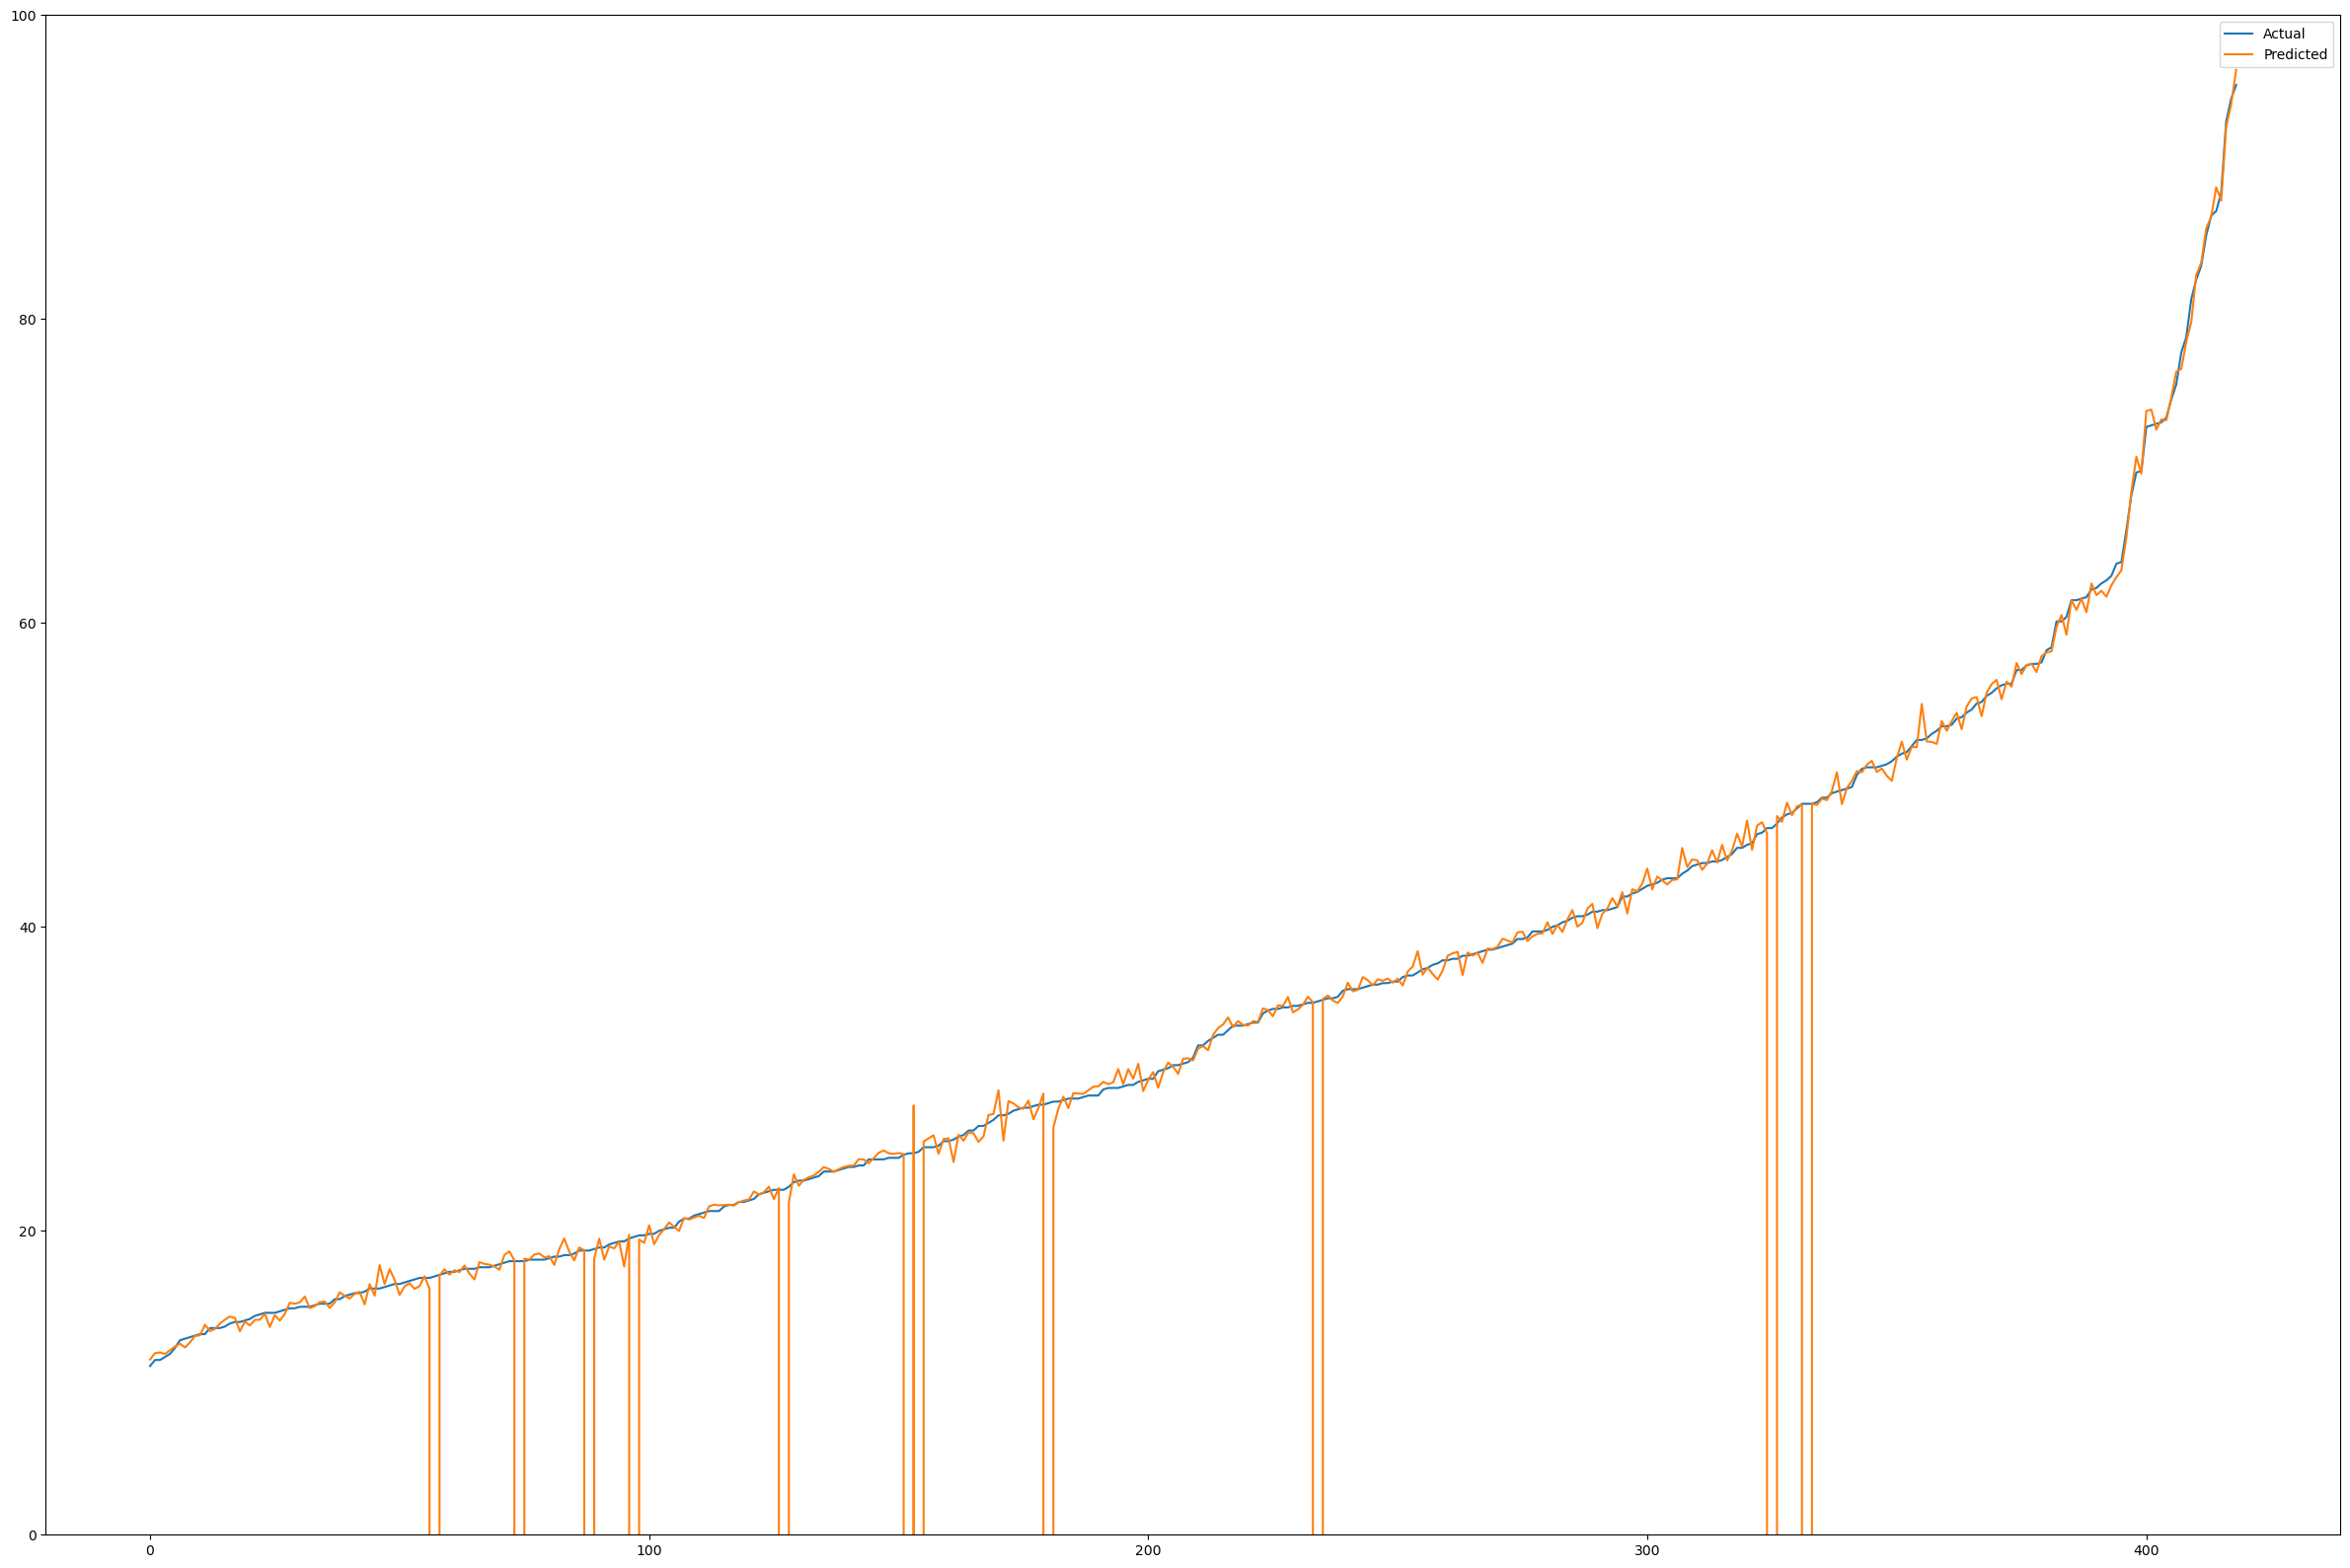

In [326]:
df.sort_values('Actual', inplace=True)
df.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(30, 20))
sn.lineplot(data=df, dashes=False)
ax.set_ylim(0, 100)
plt.show()

5. Kako dobro model napove vrednosti preverite še s tremi metrikami: srednjo absolutno napako, srednjo kvadratno napako in odstotkom razložene variance. Poleg vsake metrike v komentar na kratko zapišite kaj z njo merimo in kakšna mora biti njena vrednost (čim višja/čim manjša), da vemo da je zgrajeni model dober.

Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. (Lower is better)

In [327]:
print('MAE: ', mean_absolute_error(y_test, predictions))

MAE:  4693472161.394761


The Mean Squared Error measures how close a regression line is to a set of data points. (Lower is better)

In [328]:
print('MSE: ', mean_squared_error(y_test, predictions))

MSE:  8.391065902015823e+20


The explained variance score explains the dispersion of errors of a given dataset. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [329]:
print('EVS: ', explained_variance_score(y_test, predictions))

EVS:  -2.7516060178235756e+18


6. Ponovite regresijo iz 2. točke, le da zdaj za vhodne podatke uporabite vse stolpce razen izhodnega razreda ter stolpcev Rank, Teaching, Research in Citations. Primerjajte v katerem primeru dobite boljše rezultate.

In [330]:
columns = uni_df.select_dtypes(include=np.number).columns.tolist()
columns.remove('Score_Result')
columns.remove('Rank')
columns.remove('Citations')
columns.remove('Teaching')
columns.remove('Research')

X = uni_df[columns]
y = uni_df['Score_Result']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=789)

model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('EVS: ', explained_variance_score(y_test, predictions))

MAE:  10.74070978465556
MSE:  201.92542008654542
EVS:  0.32345935970511663


7. Podatke razdelite na učno in testno množico s pomočjo navzkrižne validacije (KFold) s petimi rezi. Še vedno napovedujete Score_Result, kot vhodne podatke pa uporabite tisto kombinacijo, ki je prej dala boljše rezultate. Merite srednjo absolutno napako. S pomočjo te navzkrižne validacije preizkusite naslednje regresijske algoritme: linearno regresijo, regresijsko drevo, regresijo z linearno metodo podpornih vektorjev, regresor naključnega gozda in ExtraTreesRegressor.

In [331]:
classificators = [LinearRegression(), DecisionTreeRegressor(max_depth=1000000), LinearSVR(), RandomForestRegressor(),
                  ExtraTreesRegressor()]

X = uni_df[columns]
y = uni_df["Score_Result"]

result = []

for clf in classificators:
    k_fold = KFold(n_splits=5, random_state=123, shuffle=True)
    cv_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='neg_mean_absolute_error')
    result.append([type(clf).__name__, abs(cv_scores.mean())])

df_result = pd.DataFrame(result, columns=['Name', 'MAE'])
print(df_result)

/opt/homebrew/Caskroom/miniforge/base/envs/4_vaja/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/4_vaja/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/4_vaja/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/4_vaja/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/4_vaja/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the

                    Name        MAE
0       LinearRegression  10.411411
1  DecisionTreeRegressor  11.540800
2              LinearSVR  11.142281
3  RandomForestRegressor   8.507061
4    ExtraTreesRegressor   8.640585


8. Izrišite graf, ki bo prikazal srednjo absolutno napako za vse uporabljene algoritme.

10.411411286011372
11.540800051203277
11.142280536582671
8.507061466973886
8.640585035842294


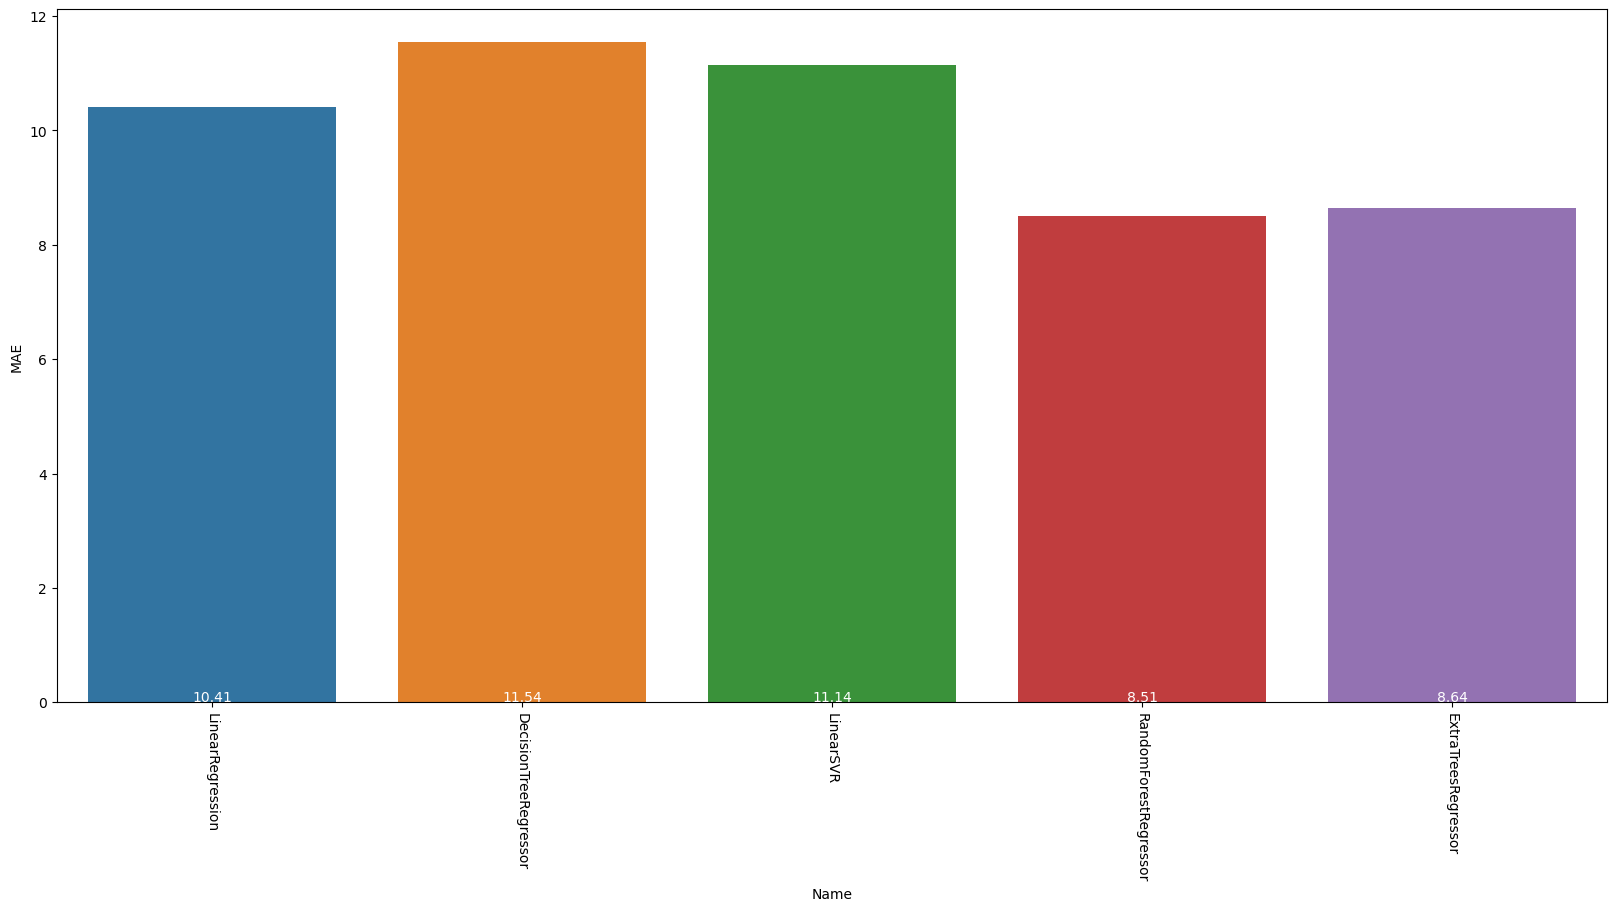

In [332]:
rcParams['figure.figsize'] = 20, 9

barplot = sn.barplot(data=df_result, x="Name", y="MAE")

for i, row in df_result.iterrows():
    print(row['MAE'])
    barplot.text(i, 0.01, round(row['MAE'], 2),
                 color='white', ha='center')

barplot.tick_params(axis='x', rotation=-90)

9. S pomočjo iskanja po mreži poiščite najboljše nastavitve parametrov za regresor naključnega gozda. Pri iskanju naj preizkusi naslednje kombinacije vrednosti parametrov: criterion = {“mse”, “mae”}, max_depth = {5, 10, 15, 20} in max_features = {“auto”, “sqrt”, “log2”}. Pri deljenju na učno in testno množico uporabite 10 rezov, meri pa se naj koeficient določljivosti (R^2 score). Izpišite najboljše vrednosti parametrov in najboljši rezultat.

In [333]:
parameters = {'criterion': ['mse', 'mae'], 'max_depth': [5, 10, 15, 20], 'max_features': ['auto', 'sqrt', 'log2']}

y = uni_df["Score_Result"]

columns = uni_df.columns.tolist()
uni_df.drop('Score_Result', axis=1, inplace=True)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=789)

clf = GridSearchCV(RandomForestRegressor(),
                   parameters,
                   cv=10,
                   scoring='r2')

clf.fit(X, y)

print('Najboljše vrednosti parametrov so:', clf.best_params_)
print('Najboljši rezultat je:', clf.best_score_)
print('Najboljša uporaba v kodi je:', clf.best_estimator_)

/opt/homebrew/Caskroom/miniforge/base/envs/4_vaja/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/4_vaja/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/4_vaja/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/4_vaja/lib/python3.10/site-packages/sklearn/ens

Najboljše vrednosti parametrov so: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'log2'}
Najboljši rezultat je: -56.86905079416789
Najboljša uporaba v kodi je: RandomForestRegressor(criterion='mae', max_depth=10, max_features='log2')
